<a href="https://colab.research.google.com/github/khwwang/coding-training/blob/master/230707_rnn_samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
samsung = pd.read_csv('/content/005930.KS.csv')
df = samsung.copy()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4537.108887,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4143.548340,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4173.250000,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4113.843262,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4284.635254,46880000
...,...,...,...,...,...,...,...
5895,2023-07-03,72700.0,73200.0,72600.0,73000.0,73000.000000,10722181
5896,2023-07-04,73400.0,73600.0,72900.0,73000.0,73000.000000,10214350
5897,2023-07-05,73000.0,73300.0,71900.0,72000.0,72000.000000,12310610
5898,2023-07-06,71900.0,72400.0,71500.0,71600.0,71600.000000,14777667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5900 non-null   object 
 1   Open       5900 non-null   float64
 2   High       5900 non-null   float64
 3   Low        5900 non-null   float64
 4   Close      5900 non-null   float64
 5   Adj Close  5900 non-null   float64
 6   Volume     5900 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 322.8+ KB


In [7]:
# type을 날짜로

df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5900 non-null   datetime64[ns]
 1   Open       5900 non-null   float64       
 2   High       5900 non-null   float64       
 3   Low        5900 non-null   float64       
 4   Close      5900 non-null   float64       
 5   Adj Close  5900 non-null   float64       
 6   Volume     5900 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 322.8 KB


In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4537.108887,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4143.548340,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4173.250000,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4113.843262,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4284.635254,46880000


In [10]:
# Date를 인덱스로 변환
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4537.108887,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4143.548340,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4173.250000,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4113.843262,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4284.635254,46880000


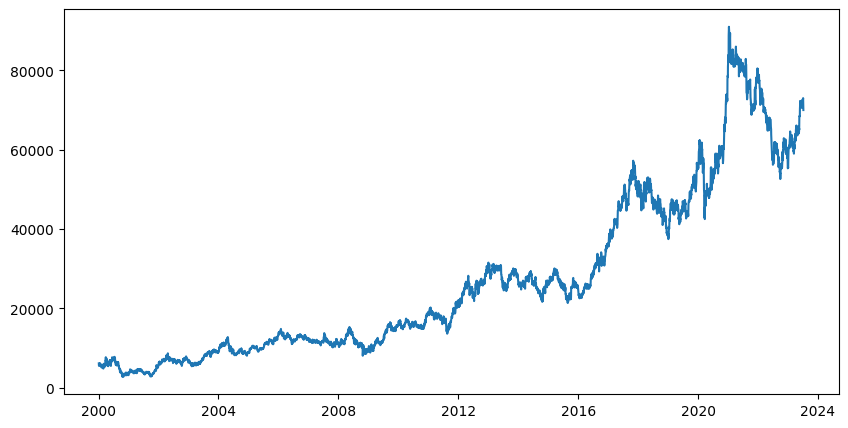

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'])
plt.show()

## feature engineering

In [12]:
df['MA5'] = np.around(df['Close'].rolling(window=5).mean(),0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA5
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4537.108887,74195000,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4143.548340,74680000,NaN
2000-01-06,5750.0,5780.0,5580.0,5620.0,4173.250000,54390000,NaN
2000-01-07,5560.0,5670.0,5360.0,5540.0,4113.843262,40305000,NaN
2000-01-10,5600.0,5770.0,5580.0,5770.0,4284.635254,46880000,5724.0


In [13]:
df['MA3'] = np.around(df['Close'].rolling(window=3).mean(),0)
df['MID'] = (df['High'] + df['Low'])/2.
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA5,MA3,MID
Date,,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4537.108887,74195000,NaN,NaN,5885.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4143.548340,74680000,NaN,NaN,5790.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4173.250000,54390000,NaN,5770.0,5680.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4113.843262,40305000,NaN,5580.0,5515.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4284.635254,46880000,5724.0,5643.0,5675.0


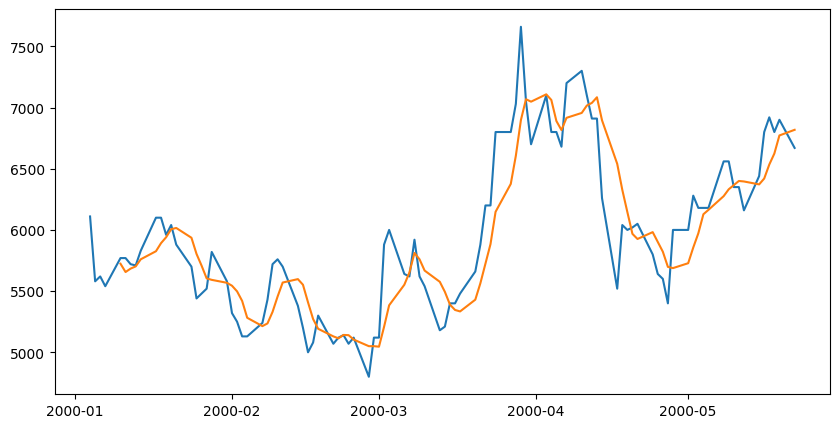

In [16]:
x = df.iloc[:100,:]

plt.figure(figsize=(10,5))
plt.plot(x.index, x['Close'])
plt.plot(x.index, x['MA5'])
plt.show()

In [17]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,MA5,MA3,MID
count,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5.900000e+03,5896.000000,5898.000000,5900.000000
mean,26638.279661,26900.162712,26367.900000,26631.162712,23090.682131,2.134631e+07,26623.118725,26627.227196,26634.031356
std,21171.429947,21338.582006,20990.908792,21153.850219,20658.610770,1.525241e+07,21135.983305,21144.845813,21164.085443
min,2540.000000,2760.000000,2420.000000,2730.000000,2027.219727,0.000000e+00,2810.000000,2790.000000,2590.000000
25%,10400.000000,10595.000000,10300.000000,10455.000000,7848.327148,1.168830e+07,10473.000000,10481.750000,10450.000000
50%,18300.000000,18500.000000,18130.000000,18320.000000,14385.260742,1.726852e+07,18304.000000,18336.500000,18315.000000
75%,42450.000000,42800.000000,41900.000000,42452.500000,37226.279297,2.650181e+07,42450.000000,42329.000000,42362.500000
max,90300.000000,96800.000000,89500.000000,91000.000000,86717.296875,1.642150e+08,89960.000000,90433.000000,93150.000000


In [18]:
df.loc[df['Volume']==0]

,Open,High,Low,Close,Adj Close,Volume,MA5,MA3,MID
Date,,,,,,,,,
2000-02-04,5130.0,5130.0,5130.0,5130.0,3809.391602,0,5282.0,5170.0,5130.0
2000-03-01,5120.0,5120.0,5120.0,5120.0,3801.964600,0,5046.0,5013.0,5120.0
2000-04-05,6800.0,6800.0,6800.0,6800.0,5049.485352,0,6890.0,6900.0,6800.0
2000-04-13,6910.0,6910.0,6910.0,6910.0,5131.166504,0,7084.0,6973.0,6910.0
2000-05-01,6000.0,6000.0,6000.0,6000.0,4455.429199,0,5728.0,5800.0,6000.0
...,...,...,...,...,...,...,...,...,...
2022-02-28,71900.0,71900.0,71900.0,71900.0,69767.609375,0,72780.0,71767.0,71900.0
2022-03-04,72900.0,72900.0,72900.0,72900.0,70737.960938,0,72260.0,72500.0,72900.0
2022-03-10,69500.0,69500.0,69500.0,69500.0,67438.796875,0,70980.0,69700.0,69500.0


In [20]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA5          4
MA3          2
MID          0
dtype: int64

In [22]:
df['Volume'] = df['Volume'].replace(0,np.nan)
df.isna().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
MA5            4
MA3            2
MID            0
dtype: int64

In [23]:
df = df.dropna()
df.shape

(5769, 9)

In [25]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
df_s = mm.fit_transform(df)

In [26]:
df_s = pd.DataFrame(df_s, columns=df.columns)
df_s.head()

,Open,High,Low,Close,Adj Close,Volume,MA5,MA3,MID
0,0.034868,0.032008,0.036288,0.034440,0.026655,0.285359,0.033215,0.032553,0.034066
1,0.037375,0.035517,0.038470,0.034440,0.026655,0.363715,0.032434,0.033123,0.036937
2,0.034982,0.031689,0.036518,0.033873,0.026217,0.177799,0.032756,0.033808,0.034011
3,0.034868,0.031689,0.036059,0.033760,0.026129,0.250704,0.032962,0.033579,0.033790
4,0.036235,0.033177,0.037437,0.035120,0.027181,0.300555,0.033628,0.033808,0.035225


### window size 정해서 데이터 분리

In [27]:
def make_sequence_dataset(X, y, window_size):
    feature_list = []
    label_list = []

    for i in range(len(X)-window_size):
        feature_list.append(X[i:i+window_size])
        label_list.append(y[i+window_size])

    return np.array(feature_list), np.array(label_list)

In [31]:
X = df_s.drop(['Close', 'Adj Close'], axis=1)
y = df_s['Close']

X_data, y_data = make_sequence_dataset(X, y, 20)

In [32]:
X_data.shape, y_data.shape

((5749, 20, 7), (5749,))

In [35]:
train_size = int(len(X_data) * 0.8)
train_size

4599

In [37]:
X_train = X_data[:4599]
X_test = X_data[4599:]

y_train = y_data[:4599]
y_test = y_data[4599:]

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4599, 20, 7), (1150, 20, 7), (4599,), (1150,))

In [41]:
from keras import layers

model = keras.Sequential([
    layers.LSTM(32, activation='tanh', input_shape=(20,7)),
    layers.Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                5120      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(
    optimizer = 'adam',
    loss='mse',
    metrics=['mse']
)

In [43]:
Epochs = 100
Batch = 32

history = model.fit(
    X_train, y_train,
    epochs=Epochs,
    batch_size=Batch,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
115/115 [==============================] - 6s 21ms/step - loss: 8.1117e-04 - mse: 8.1117e-04 - val_loss: 1.8486e-04 - val_mse: 1.8486e-04
Epoch 2/100
115/115 [==============================] - 1s 13ms/step - loss: 4.8321e-05 - mse: 4.8321e-05 - val_loss: 1.7356e-04 - val_mse: 1.7356e-04
Epoch 3/100
115/115 [==============================] - 2s 13ms/step - loss: 4.2088e-05 - mse: 4.2088e-05 - val_loss: 2.3977e-04 - val_mse: 2.3977e-04
Epoch 4/100
115/115 [==============================] - 1s 13ms/step - loss: 4.0315e-05 - mse: 4.0315e-05 - val_loss: 3.3962e-04 - val_mse: 3.3962e-04
Epoch 5/100
115/115 [==============================] - 1s 12ms/step - loss: 3.6229e-05 - mse: 3.6229e-05 - val_loss: 2.4878e-04 - val_mse: 2.4878e-04
Epoch 6/100
115/115 [==============================] - 1s 13ms/step - loss: 3.7352e-05 - mse: 3.7352e-05 - val_loss: 4.3985e-04 - val_mse: 4.3985e-04
Epoch 7/100
115/115 [==============================] - 2s 16ms/step - loss: 3.3294e-05 - mse: 3.3294

### learning rate

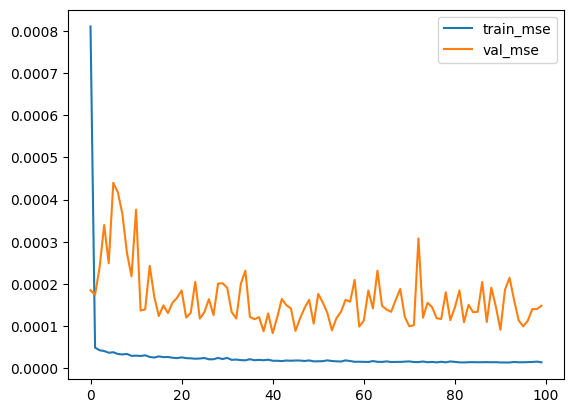

In [52]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.plot(hist['epoch'], hist['mse'], label='train_mse')
plt.plot(hist['epoch'], hist['val_mse'], label='val_mse')
plt.legend()
plt.show()

### 예측

In [48]:
y_pred = model.predict(X_test).reshape(-1, 1)

36/36 [==============================] - 0s 4ms/step


In [49]:
for i in range(10):
  print(y_test[i], y_pred[i])

0.46244477172312226 [0.45602036]
0.4567803330689929 [0.4534824]
0.4511158944148635 [0.44612023]
0.43355613458706244 [0.44454706]
0.43355613458706244 [0.42128536]
0.4380876855103659 [0.43062547]
0.44885011895321175 [0.43019757]
0.4494165628186247 [0.44121945]
0.44658434349156 [0.44143304]
0.4692420981080775 [0.4420783]


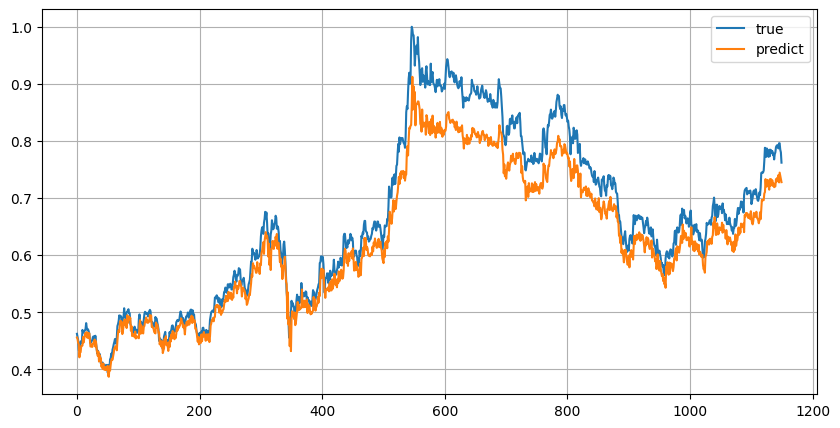

In [51]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predict')
plt.grid()
plt.legend()
plt.show()

### stack lstm

In [ ]:
from keras import layers

model = keras.Sequential([
    layers.LSTM(32, activation='tanh',return_sequence=True, input_shape=(20,7)),
    layers.LSTM(32, activation='tanh'),
    layers.Dense(1)
])
model.summary()

# nlp embedding

In [53]:
corpus = {
    'I love my dog',
    'I love my cat',
    'You love my dog',
    'Do to think my dog is amazing'
}

In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=100, oov_token='<OOV>')
tokenizer.fit_on_texts(corpus)

In [57]:
tokenizer.word_index

{'<OOV>': 1,
 'my': 2,
 'love': 3,
 'dog': 4,
 'i': 5,
 'cat': 6,
 'you': 7,
 'do': 8,
 'to': 9,
 'think': 10,
 'is': 11,
 'amazing': 12}

In [58]:
sequences = tokenizer.texts_to_sequences(corpus)
sequences

[[5, 3, 2, 6], [5, 3, 2, 4], [7, 3, 2, 4], [8, 9, 10, 2, 4, 11, 12]]

In [62]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded = pad_sequences(sequences, maxlen=6, padding='pre')
padded

array([[ 0,  0,  5,  3,  2,  6],
       [ 0,  0,  5,  3,  2,  4],
       [ 0,  0,  7,  3,  2,  4],
       [ 9, 10,  2,  4, 11, 12]], dtype=int32)

In [63]:
from tensorflow.keras.utils import to_categorical
padded_seq = to_categorical(padded)

In [64]:
padded_seq

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    